<a href="https://colab.research.google.com/github/AlexeySto/Sentiment-Analysis-Pipeline/blob/main/Sentiment_Analysis_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Инструменты разметки наборов данных**

Задача 1.

Выполните разметку на основе правил (rule-based labeling) на подмножестве выбранного датасета. Разработайте и реализуйте набор правил или условий, которые позволят автоматически присваивать метки данным на основе определенных шаблонов или критериев.

Задача 2.

Выполните разметку вручную отдельного подмножества выбранного датасета с помощью выбранного вами инструмента разметки.

Задача 3.

Объедините данные, размеченные вручную, с данными, размеченными на основе правил. Объедините два подмножества размеченных данных в один набор данных, сохранив при этом соответствующую структуру и целостность.

Задача 4.

Обучите модель машинного обучения, используя объединенный набор размеченных данных. Разделите датасет на обучающий и тестовый наборы и используйте обучающий набор для обучения модели.

Задача 5.

Оценить эффективность обученной модели на тестовом датасете. Используйте подходящие метрики оценки. Интерпретируйте результаты и проанализируйте эффективность модели в решении задачи разметки.

In [21]:
import pandas as pd
import numpy as np
import pathlib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder

In [5]:
# Загружаем датасет
data = pd.read_csv('training.csv', engine='python', encoding='utf-8', on_bad_lines='skip')
# Посмотреть первые 5 строк
data.head()

,target,ids,date,flag,user,text
0,4,1563973200,Mon Apr 20 01:07:49 PDT 2009,NO_QUERY,kitdude21,I can haz view? VEDA 20: Early morning upload...
1,0,2191891505,Tue Jun 16 06:09:10 PDT 2009,NO_QUERY,CalumCurry,OMG.. PIMP DOG KID IS LEAVIN CAPETOWN TODAY A...
2,4,2055591774,Sat Jun 06 09:35:52 PDT 2009,NO_QUERY,krispysmith,Never been so happy to be in a church in my en...
3,0,1557934957,Sun Apr 19 06:38:13 PDT 2009,NO_QUERY,KiviKaamos,my bf hate me. i'm so sad
4,4,1677627307,Sat May 02 03:06:39 PDT 2009,NO_QUERY,Dee_Staack,Bored; aha 50th update


In [9]:
# Разделяем датасет на части для разметки вручную и по правилам
data = shuffle(data)
manual_data, rule_based_data = train_test_split(data, train_size=0.005, random_state=42)
manual_data.to_csv("for_manual_marking.csv", index=False)
manual_data

,target,ids,date,flag,user,text
823,0,2299867240,Tue Jun 23 13:26:41 PDT 2009,NO_QUERY,clandestinique,@HuntedWumpus hmmmmm I dono about that.... Hah...
26259,4,2062303710,Sat Jun 06 22:51:34 PDT 2009,NO_QUERY,Jaaycooxo,Bride Wars is a great movie; it made me teary
56581,0,2250400579,Sat Jun 20 00:26:04 PDT 2009,NO_QUERY,dontforgetchaos,@Orchidflower Nothing Not at work until 3 tom...
20274,4,1564331158,Mon Apr 20 02:57:54 PDT 2009,NO_QUERY,thatladyj,@ARE_OH_ES_ES lol! Aww thanks! Good mornin...
24190,4,1971858188,Sat May 30 08:03:03 PDT 2009,NO_QUERY,kjgriffin18,Me n my walking in beantown I got my ipod on l...
...,...,...,...,...,...,...
34533,0,2324514044,Thu Jun 25 03:21:02 PDT 2009,NO_QUERY,lianacrebbin,my geography teacher is out to purposely tortu...
150484,4,1978309759,Sat May 30 22:59:24 PDT 2009,NO_QUERY,Francisquitah,@Alohran MuacK :^* MuacK :^* MuacK :^* MuacK ...
36369,4,1694108849,Mon May 04 01:07:25 PDT 2009,NO_QUERY,bliink12,taylor swift's &quot;you belong with me&quot; ...
18349,0,2204231698,Wed Jun 17 01:40:15 PDT 2009,NO_QUERY,theitaliangirl,i miss tuesdays at My House like crazy. i wann...


In [10]:
# Функция для разметки данных по правилам:
def label_sentiment(text):
    positive_words = ["good", "excellent", "love", "happy", "wonderful"]
    negative_words = ["bad", "I don't like", "sad", "terrible"]

    if any(word in text for word in positive_words):
        return 2
    elif any(word in text for word in negative_words):
        return 1
    else:
        return 0

# Примените эту функцию к подмножеству данных
rule_based_data['sentiment'] = rule_based_data['text'].apply(label_sentiment)
rule_based_data

,target,ids,date,flag,user,text,sentiment
57444,0,2039664915,Thu Jun 04 22:30:15 PDT 2009,NO_QUERY,DebWorldOfBooks,Ack. Taping up books to mail out and it woke u...,0
92270,4,1997852419,Mon Jun 01 17:34:05 PDT 2009,NO_QUERY,TheBellWitch,@Mattdavelewis @Tom Felton so are you guys goi...,0
51364,4,2053233266,Sat Jun 06 03:47:55 PDT 2009,NO_QUERY,shanajaca,@James_Phelps Doing great !!Are you going to P...,0
148070,4,1558885768,Sun Apr 19 09:40:25 PDT 2009,NO_QUERY,darrengeraghty,@BrendanDeBeasi The dark stroke defines it muc...,0
67694,0,2229872668,Thu Jun 18 16:19:33 PDT 2009,NO_QUERY,justbeparanoid,I am sad,1
...,...,...,...,...,...,...,...
61140,0,2189037439,Mon Jun 15 23:06:04 PDT 2009,NO_QUERY,csaltzman,math is gonna kick my booty Its 11 and I have...,0
74590,0,1960252817,Fri May 29 07:40:11 PDT 2009,NO_QUERY,sherischrier,"@BleedingSweat I saw this link, but I get an e...",0
3799,0,2048018332,Fri Jun 05 14:32:07 PDT 2009,NO_QUERY,mzna,@the_zomboid demasiado stresssss,0
72193,4,1973604003,Sat May 30 11:28:38 PDT 2009,NO_QUERY,Pale_Jewel,@WoollyKnickers mr tweet is cool.,0


In [11]:
# Загружаем датасет размеченный в ручную
manual_data = pd.read_csv('manual_data.csv', engine='python', encoding='utf-8', on_bad_lines='skip')

# Убедимся, что столбец 'sentiment' имеет числовые значения
label_encoder = LabelEncoder()
manual_data['sentiment'] = label_encoder.fit_transform(manual_data['sentiment'])

manual_data

,annotation_id,annotator,created_at,date,flag,id,ids,lead_time,sentiment,target,text,updated_at,user
0,1,1,2024-10-25T19:49:36.997939Z,Tue Jun 02 11:17:55 PDT 2009,NO_QUERY,798,2006527422,7.096,1,0,feeling tired already (actually woke up tired)...,2024-10-25T19:49:36.997939Z,sognix
1,5,1,2024-10-27T16:24:35.897588Z,Sun May 17 02:40:50 PDT 2009,NO_QUERY,799,1824731463,13.592,1,4,"@frombecca yes u should,but add little nuggets...",2024-10-27T16:24:35.897588Z,LukeWMangan
2,4,1,2024-10-27T16:23:40.303248Z,Mon Jun 01 13:40:15 PDT 2009,NO_QUERY,800,1995550626,12.037,1,4,@BlatzLiquor2 oh man...i guess i've been away ...,2024-10-27T16:23:40.303248Z,majastevanovich
3,7,1,2024-10-27T16:25:51.600549Z,Sat Jun 20 18:33:45 PDT 2009,NO_QUERY,801,2260033803,22.742,1,0,up to early yet again.....,2024-10-27T16:25:51.600549Z,bleezyblaze
4,6,1,2024-10-27T16:24:51.560783Z,Sat Jun 20 20:04:53 PDT 2009,NO_QUERY,802,2260984116,10.158,1,0,I would be in the New Dallas Texas Stadium,2024-10-27T16:24:51.561783Z,_AndreaJonas_
...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,793,1,2024-10-28T15:02:31.868232Z,Tue Jun 02 19:51:49 PDT 2009,NO_QUERY,1590,2011972568,40.349,2,4,@hammerheart I have been looking for internshi...,2024-10-28T15:02:31.868232Z,federalcase
793,794,1,2024-10-28T15:02:42.257929Z,Sun Jun 07 13:39:50 PDT 2009,NO_QUERY,1591,2068195394,8.143,0,0,oh this is so sad a 59 yr old man secret mill...,2024-10-28T15:02:42.257929Z,padfootcullen
794,795,1,2024-10-28T15:02:55.736480Z,Sat Jun 06 08:44:19 PDT 2009,NO_QUERY,1592,2055121413,10.705,1,4,Finally got my eyebrows waxed I'm never going ...,2024-10-28T15:02:55.736480Z,AshleyJCherry
795,796,1,2024-10-28T15:03:30.301003Z,Fri Jun 19 06:23:26 PDT 2009,NO_QUERY,1593,2237807287,31.948,1,0,@natybaby and I'm staying with mom dukes still...,2024-10-28T15:03:30.301003Z,Sweet4283


In [12]:
# Объединим размеченные по правилам и в ручную датасеты:
combined_data = pd.concat([manual_data, rule_based_data], ignore_index=True)
combined_data

,annotation_id,annotator,created_at,date,flag,id,ids,lead_time,sentiment,target,text,updated_at,user
0,1.0,1.0,2024-10-25T19:49:36.997939Z,Tue Jun 02 11:17:55 PDT 2009,NO_QUERY,798.0,2006527422,7.096,1,0,feeling tired already (actually woke up tired)...,2024-10-25T19:49:36.997939Z,sognix
1,5.0,1.0,2024-10-27T16:24:35.897588Z,Sun May 17 02:40:50 PDT 2009,NO_QUERY,799.0,1824731463,13.592,1,4,"@frombecca yes u should,but add little nuggets...",2024-10-27T16:24:35.897588Z,LukeWMangan
2,4.0,1.0,2024-10-27T16:23:40.303248Z,Mon Jun 01 13:40:15 PDT 2009,NO_QUERY,800.0,1995550626,12.037,1,4,@BlatzLiquor2 oh man...i guess i've been away ...,2024-10-27T16:23:40.303248Z,majastevanovich
3,7.0,1.0,2024-10-27T16:25:51.600549Z,Sat Jun 20 18:33:45 PDT 2009,NO_QUERY,801.0,2260033803,22.742,1,0,up to early yet again.....,2024-10-27T16:25:51.600549Z,bleezyblaze
4,6.0,1.0,2024-10-27T16:24:51.560783Z,Sat Jun 20 20:04:53 PDT 2009,NO_QUERY,802.0,2260984116,10.158,1,0,I would be in the New Dallas Texas Stadium,2024-10-27T16:24:51.561783Z,_AndreaJonas_
...,...,...,...,...,...,...,...,...,...,...,...,...,...
159491,NaN,NaN,NaN,Mon Jun 15 23:06:04 PDT 2009,NO_QUERY,NaN,2189037439,NaN,0,0,math is gonna kick my booty Its 11 and I have...,NaN,csaltzman
159492,NaN,NaN,NaN,Fri May 29 07:40:11 PDT 2009,NO_QUERY,NaN,1960252817,NaN,0,0,"@BleedingSweat I saw this link, but I get an e...",NaN,sherischrier
159493,NaN,NaN,NaN,Fri Jun 05 14:32:07 PDT 2009,NO_QUERY,NaN,2048018332,NaN,0,0,@the_zomboid demasiado stresssss,NaN,mzna
159494,NaN,NaN,NaN,Sat May 30 11:28:38 PDT 2009,NO_QUERY,NaN,1973604003,NaN,0,4,@WoollyKnickers mr tweet is cool.,NaN,Pale_Jewel


In [13]:
# Разделяем датасет на обучающий и тестовый
train_data, test_data = train_test_split(combined_data, train_size=0.2, random_state=42)

In [14]:
# Функция для обучения модели логистической регрессии на размеченных данных
def train_model(labeled_data):
    # Векторизация текстовых данных
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(labeled_data['text'])
    y = labeled_data['sentiment']

    # Обучение модели
    model = LogisticRegression(max_iter=200)
    model.fit(X, y)

    return model, vectorizer

# Обучаем модель
model, vectorizer = train_model(train_data)

In [15]:
# Оценка модели
X_test = vectorizer.transform(test_data['text'])
y_test_predicted = model.predict(X_test)
f1 = f1_score(test_data['sentiment'], y_test_predicted, average='weighted')

print(f'F1-мера: {f1:.4f}')

F1-мера: 0.9558


Модель хорошо справляется с задачей разметки.

In [19]:
# Дополнительные метрики оценки
print("\nКлассификационный отчет:")
print(classification_report(test_data['sentiment'], y_test_predicted))


Классификационный отчет:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98    109639
           1       0.88      0.79      0.84      4687
           2       0.85      0.83      0.84     13271

    accuracy                           0.96    127597
   macro avg       0.90      0.87      0.88    127597
weighted avg       0.96      0.96      0.96    127597



**Разбор полученных значений.**

**Precision** (Точность)
 — это доля правильно классифицированных объектов класса среди всех объектов, которые были классифицированы как этот класс.

Например, для класса 0 (нейтральные отзывы) точность равна 0.97, что означает, что 97% объектов, классифицированных как нейтральные, действительно нейтральные.

**Recall** (Полнота)
 — это доля правильно классифицированных объектов класса среди всех объектов этого класса в данных.

Например, для класса 0 полнота равна 0.98, что означает, что 98% всех нейтральных объектов были правильно классифицированы.

**F1-score** (F1-мера)
 — это гармоническое среднее между точностью и полнотой. Это метрика, которая учитывает и точность, и полноту.

Например, для класса 0 F1-мера равна 0.98, что означает, что модель хорошо справляется с классификацией нейтральных объектов.

**Support** (Поддержка)
 — это количество объектов каждого класса в тестовом наборе данных.

Например, для класса 0 поддержка равна 109639, что означает, что в тестовом наборе 109639 объектов класса 0.

Общая эффективность модели

**Accuracy** (Точность)
— это общая доля правильно классифицированных объектов во всех классах.

Точность равна 0.96, что означает, что модель правильно классифицировала 96% всех объектов в тестовом наборе.

**Macro avg** (Среднее по классам)
 — это среднее значение метрик (точности, полноты, F1-меры) по всем классам, без учета их размеров.

Например, средняя точность по классам равна 0.90, средняя полнота — 0.87, средняя F1-мера — 0.88.

**Weighted avg** (Взвешенное среднее)
 — это среднее значение метрик, взвешенное по размерам классов.

Например, взвешенная точность равна 0.96, взвешенная полнота — 0.96, взвешенная F1-мера — 0.96.

**Интерпретация результатов**

Класс 0 (нейтральные отзывы):

Точность: 0.97

Полнота: 0.98

F1-мера: 0.98

Поддержка: 109639

Модель хорошо справляется с классификацией нейтральных отзывов.

Класс 1 (отрицательные отзывы):

Точность: 0.88

Полнота: 0.79

F1-мера: 0.84

Поддержка: 4687

Модель немного хуже справляется с классификацией отрицательных отзывов, но результаты все еще хорошие.

Класс 2 (положительные отзывы):

Точность: 0.85

Полнота: 0.83

F1-мера: 0.84

Поддержка: 13271

Модель также хорошо справляется с классификацией положительных отзывов.

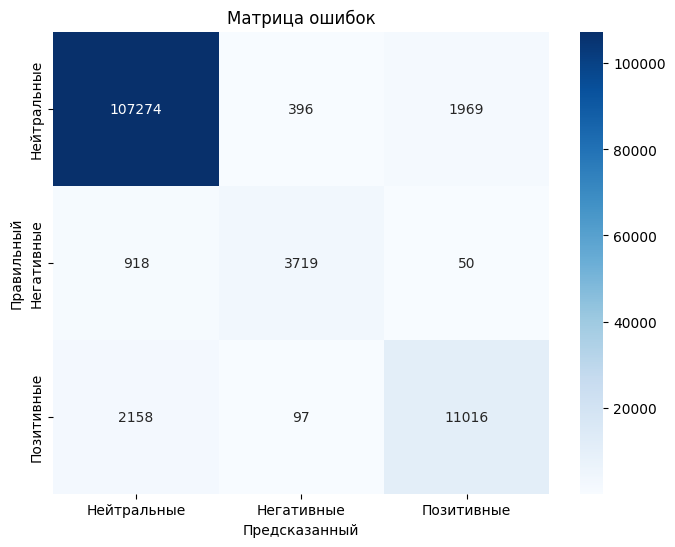

In [24]:
# Матрица ошибок
conf_matrix = np.array(confusion_matrix(test_data['sentiment'],
                                        y_test_predicted))

# Названия классов
class_names = ['Нейтральные', 'Негативные', 'Позитивные']

# Визуализация матрицы ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Предсказанный')
plt.ylabel('Правильный')
plt.title('Матрица ошибок')
plt.show()

**Интерпретация матрицы ошибок**

**Класс 0** (нейтральные отзывы)

107274: Истинно нейтральные отзывы, правильно классифицированные как нейтральные.

396: Нейтральные отзывы, ошибочно классифицированные как отрицательные.

1969: Нейтральные отзывы, ошибочно классифицированные как положительные.

Модель хорошо справляется с классификацией нейтральных отзывов, но все же допускает некоторые ошибки, классифицируя их как отрицательные или положительные.

**Класс 1** (отрицательные отзывы)

918: Отрицательные отзывы, ошибочно классифицированные как нейтральные.

3719: Истинно отрицательные отзывы, правильно классифицированные как отрицательные.

50: Отрицательные отзывы, ошибочно классифицированные как положительные.

Модель имеет больше ошибок в классификации отрицательных отзывов, особенно путая их с нейтральными.

**Класс 2** (положительные отзывы)

2158: Положительные отзывы, ошибочно классифицированные как нейтральные.

97: Положительные отзывы, ошибочно классифицированные как отрицательные.

11016: Истинно положительные отзывы, правильно классифицированные как положительные.

Модель также имеет больше ошибок в классификации положительных отзывов, особенно путая их с нейтральными.

**Выводы**

Общая эффективность: Модель в целом хорошо справляется с задачей классификации, но есть некоторые проблемы с классификацией отрицательных и положительных отзывов.

Улучшения: Можно попробовать улучшить модель, используя более сложные алгоритмы, предобработку текста или подбор гиперпараметров.

**Дополнительные улучшения**

Использование более сложных моделей: Например, можно использовать модели на основе нейронных сетей, такие как BERT или LSTM.

Предобработка текста: Лемматизация, удаление стоп-слов, стемминг и другие техники могут улучшить качество векторизации текста.

Гиперпараметры: Подбор гиперпараметров модели может улучшить ее эффективность.
Перекрестная проверка: Использование кросс-валидации может дать более стабильные результаты.